In [ ]:
from google.colab import files
uploaded = files.upload()

Saving houseprices.csv to houseprices.csv


In [ ]:
import pandas as pd
df = pd.read_csv('houseprices.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
print(df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [ ]:
 #missing_vlues

missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [ ]:
df = df.drop(['PoolQC','MiscFeature','Alley'],axis=1)
df['Fence'] = df['Fence'].fillna('None')
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
garage_cols_none = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_cols_none:
    df[col] = df[col].fillna('None')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)


bsmt_cols = ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']
for col in bsmt_cols:
    df[col] = df[col].fillna('None')

df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])



KeyError: "['PoolQC', 'MiscFeature', 'Alley'] not found in axis"

In [ ]:
print(df.isnull().sum().sum())

0


In [ ]:
#EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

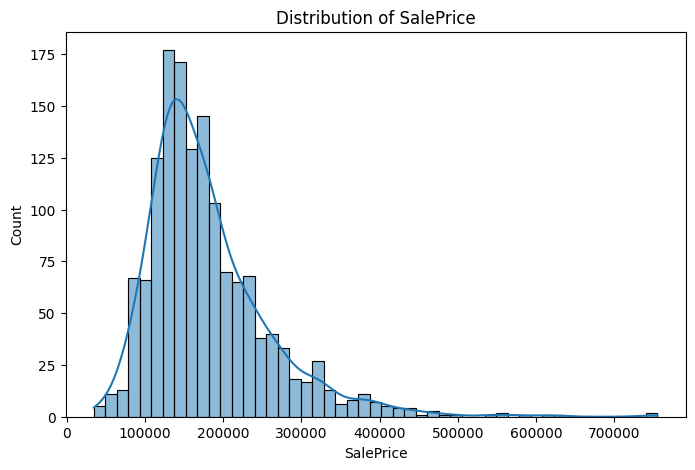

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice'], kde=True)

plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Count')

# Show the plot
plt.show()

In [ ]:
# Get only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])


In [ ]:
# Calculate correlation matrix (Pearson correlation)
correlation = numeric_df.corr()

In [ ]:
saleprice_corr = correlation['SalePrice'].sort_values(ascending=False)
print(saleprice_corr.head(10))   # Top 10

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


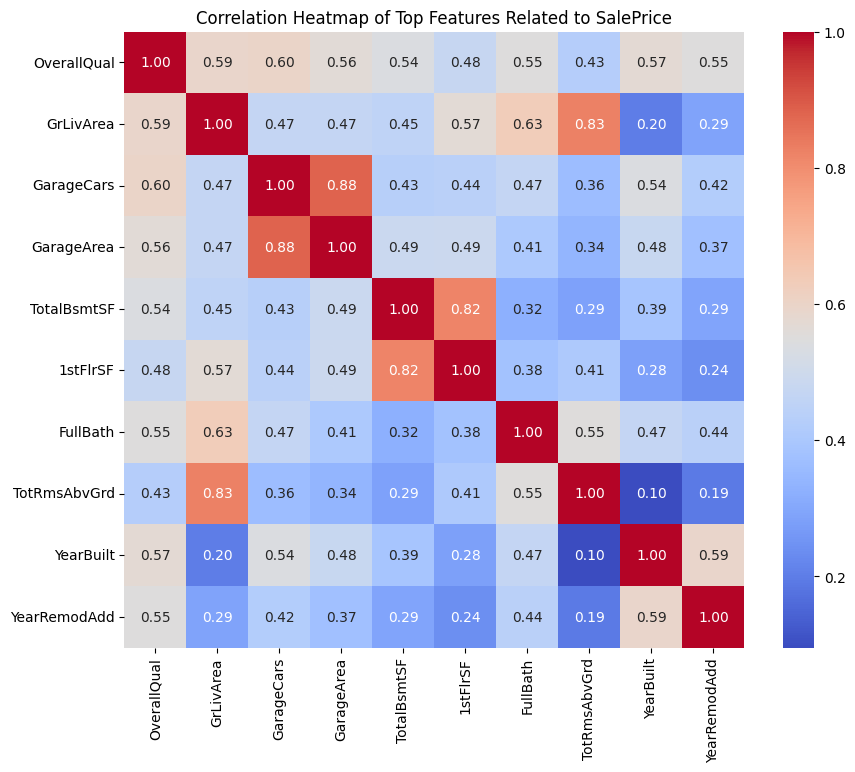

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 features most correlated with SalePrice
top_features = saleprice_corr.index[1:11]  # [1:11] → exclude 'SalePrice' itself

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap of Top Features Related to SalePrice")
plt.show()


In [ ]:
# Separate target (SalePrice) from features
y = df['SalePrice']
X = df.drop('SalePrice', axis=1)


In [ ]:
# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X)


In [ ]:
print(X.shape)
print(y.shape)


(1460, 290)
(1460,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict on test set
y_pred = model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 29665.255478424795


In [ ]:
from sklearn.linear_model import Ridge

# Create Ridge model with alpha=1.0
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predict and calculate RMSE
y_pred_ridge = ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("Ridge RMSE:", rmse_ridge)


Ridge RMSE: 29418.10120287155


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create the model with default settings
rf = RandomForestRegressor(random_state=42)

# Train the model
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Predict on test data
y_pred_rf = rf.predict(X_test)

# Calculate RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest RMSE:", rmse_rf)


Random Forest RMSE: 28978.091985040443


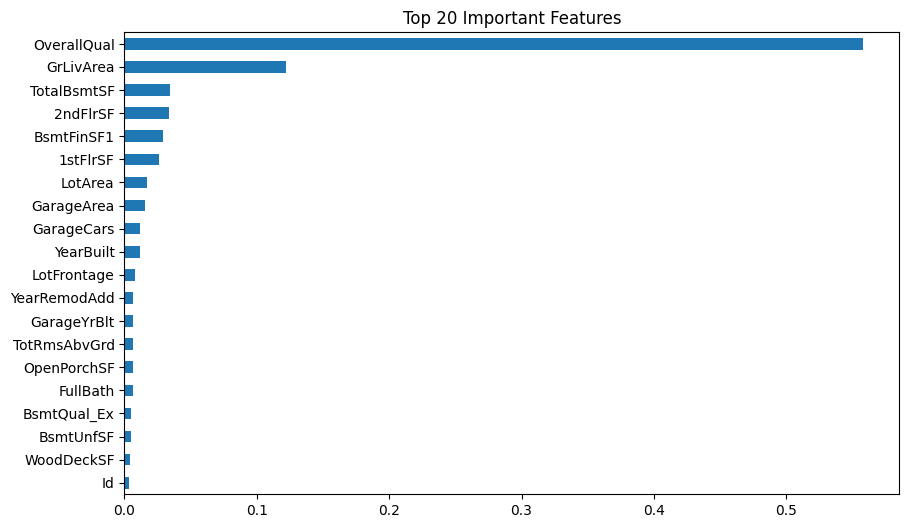

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the model
importances = rf.feature_importances_

# Create a DataFrame to visualize it
feat_importances = pd.Series(importances, index=X.columns)

# Sort and plot the top 20 features
top_features = feat_importances.sort_values(ascending=False).head(20)
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title("Top 20 Important Features")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
#Train Random Forest model using only top 5 important features and evaluate RMSE

In [ ]:
top_5_features = top_features.index[:5]

X_top5 = X[top_5_features]
X_train_top5, X_valid_top5, y_train, y_valid = train_test_split(X_top5, y, test_size=0.2, random_state=42)

rf_top5 = RandomForestRegressor(random_state=42)
rf_top5.fit(X_train_top5, y_train)

y_pred_top5 = rf_top5.predict(X_valid_top5)
rmse_top5 = np.sqrt(mean_squared_error(y_valid, y_pred_top5))

print("Random Forest RMSE with Top 5 Features:", round(rmse_top5))


Random Forest RMSE with Top 5 Features: 29706


In [ ]:
y = df['SalePrice']
X = df.drop('SalePrice', axis=1)

In [ ]:
X.shape

(1460, 77)

In [ ]:
uploaded = files.upload()

Saving test.csv to test (5).csv


In [ ]:
X_test.shape

(1459, 77)

In [ ]:
#X_test = X_test.drop(['PoolQC','MiscFeature','Alley'],axis=1)
X_test['Fence'] = X_test['Fence'].fillna('None')
X_test['MasVnrType'] = X_test['MasVnrType'].fillna(X_test['MasVnrType'].mode()[0])

X_test['FireplaceQu'] = X_test['FireplaceQu'].fillna('None')
X_test['LotFrontage'] = X_test['LotFrontage'].fillna(X_test['LotFrontage'].median())
garage_cols_none = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_cols_none:
    df[col] = df[col].fillna('None')
X_test['GarageYrBlt'] = X_test['GarageYrBlt'].fillna(0)


bsmt_cols = ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']
for col in bsmt_cols:
    X_test[col] = X_test[col].fillna('None')

X_test['MasVnrArea'] = X_test['MasVnrArea'].fillna(X_test['MasVnrArea'].median())

X_test['Electrical'] = X_test['Electrical'].fillna(X_test['Electrical'].mode()[0])

In [ ]:
all_data = pd.concat([X, X_test], axis=0)
all_data = pd.get_dummies(all_data)
all_data = all_data.fillna(0)
X = all_data.iloc[:len(X), :].copy()
X_test = all_data.iloc[len(X):, :].copy()

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# General comment: Train XGBoost model and evaluate RMSE

import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

xgb_model = xgb.XGBRegressor(random_state=42, n_estimators=200, learning_rate=0.05)

xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_valid)

xgb_rmse = np.sqrt(mean_squared_error(y_valid, xgb_preds))
print("XGBoost RMSE:", xgb_rmse)


XGBoost RMSE: 25072.547537097224


In [ ]:

test_ids = X_test['Id']
test_preds =xgb_model.predict(X_test)

In [ ]:
output = pd.DataFrame({'Id': test_ids, 'SalePrice': test_preds})


In [ ]:
output.to_csv('submission.csv', index=False)


In [ ]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>